In [653]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [654]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score,classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Data loading

In [655]:
df = pd.read_csv('https://raw.githubusercontent.com/annwanginnt/AI2/main/train.csv')

df2 = pd.read_csv('https://raw.githubusercontent.com/annwanginnt/AI2/main/test.csv')

In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [657]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [658]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Data Cleaning  | Preparation | Feature Engineering

In [659]:
print(df['Cabin'].nunique())
print(df['Parch'].nunique())
print(df['Embarked'].nunique())
print(df['SibSp'].nunique())
df['Pclass'].nunique()

147
7
3
7


3

Handle Missing values and unnecessary columns

In [660]:

# fill Null value of 'Age' with the mean value by sex
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'))

# drop 'Cabin' variable, due to have too much Null value
df = df.drop('Cabin',axis=1)

# drop missing value in 'Embarked' feature
df = df.dropna(subset=['Embarked'])

# drop unrelated columns
df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)



### Data Statistics

In [661]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.382452,2.311586,NaN,29.690446,0.524184,0.382452,32.096681,NaN
std,0.486260,0.834700,NaN,12.981441,1.103705,0.806761,49.697504,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.000000,NaN,30.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


## Exploratory Analysis

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

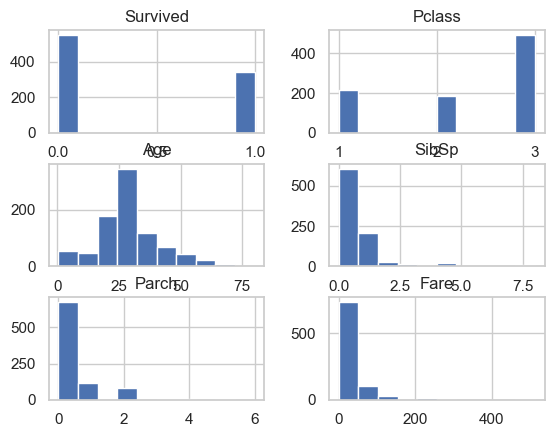

In [662]:
df.hist()

<function matplotlib.pyplot.show(close=None, block=None)>

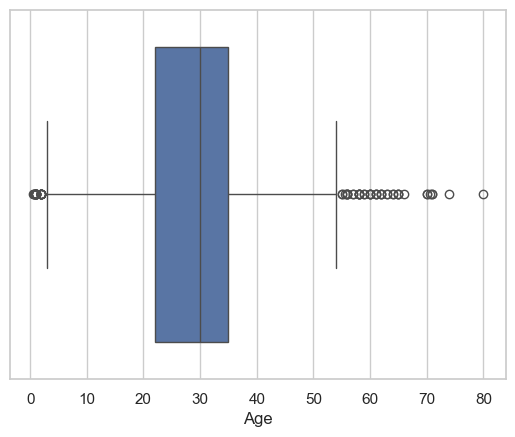

In [663]:
# check outliers
sns.boxplot(x = df['Age'])
plt.show

<Axes: xlabel='Fare'>

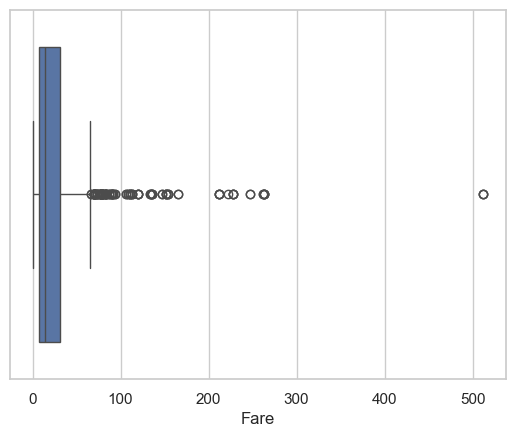

In [664]:
sns.boxplot(x = df['Fare'])

([<matplotlib.patches.Wedge at 0x12211de7590>,
 [Text(-0.49644324689069674, 0.9816028232521659, 'male'),
  Text(0.4964432468906962, -0.9816028232521663, 'female')])

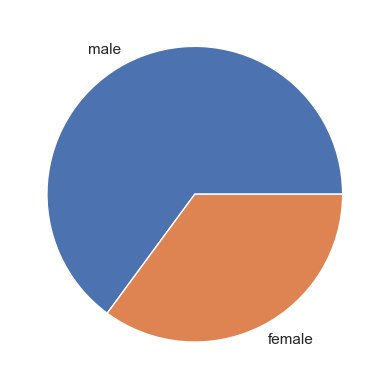

In [668]:
sex_counts = df['Sex'].value_counts()
plt.pie(sex_counts, labels = sex_counts.index)

<Axes: xlabel='Age', ylabel='Fare'>

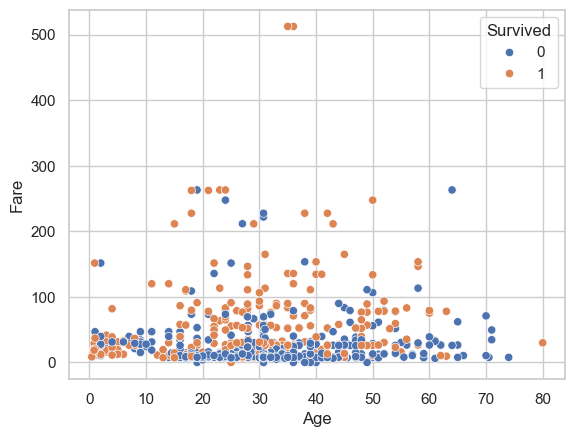

In [670]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data = df)

### Feature Engineering

In [ ]:
# define X and Y
X = df.drop('Survived', axis=1)
y = df['Survived']


# identify numerical and categorical columns
num_cols = X.select_dtypes(include=['float64','int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

#build pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# split data

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25, random_state=42)

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)
X_val = pipeline.fit_transform(X_val)

## Build models

Linear Model  --Logistric Regresssion

In [ ]:
# train model
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)


lr_accracy = accuracy_score(y_test, y_pred_lr)
lr_confusion_matrix = confusion_matrix(y_test,y_pred_lr)
lr_f1_score = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, lr_prob[:,1])

print('Logistic Regression Accuracy Score: ', lr_accracy)
print('Logistic Regression F1 Score: ', lr_f1_score)

print('Logistic Regression Confusion Matrix: ', lr_confusion_matrix)
print('Logistic Regression ROC AUC Score: ', lr_roc_auc)


Logistic Regression Accuracy Score:  0.8089887640449438
Logistic Regression F1 Score:  0.7571428571428571
Logistic Regression Confusion Matrix:  [[91 18]
 [16 53]]
Logistic Regression ROC AUC Score:  0.8470283207020344


In [ ]:
# validation

y_pred_val = lr.predict(X_val)
lr_prob_val = lr.predict_proba(X_val)

lr_accracy_val = accuracy_score(y_val, y_pred_val)
lr_f1_score_val = f1_score(y_val, y_pred_val)
lr_confusion_matrix_val = confusion_matrix(y_val,y_pred_val)
lr_roc_auc_val = roc_auc_score(y_val, lr_prob_val[:,1])

print('Logistic Regression Accuracy Score: ', lr_accracy_val)
print('Logistic Regression F1 Score: ', lr_f1_score_val)
print('Logistic Regression Confusion Matrix: ', lr_confusion_matrix_val)
print('Logistic Regression ROC AUC Score: ', lr_roc_auc_val)

Logistic Regression Accuracy Score:  0.8258426966292135
Logistic Regression F1 Score:  0.7350427350427351
Logistic Regression Confusion Matrix:  [[104  10]
 [ 21  43]]
Logistic Regression ROC AUC Score:  0.8314830043859649


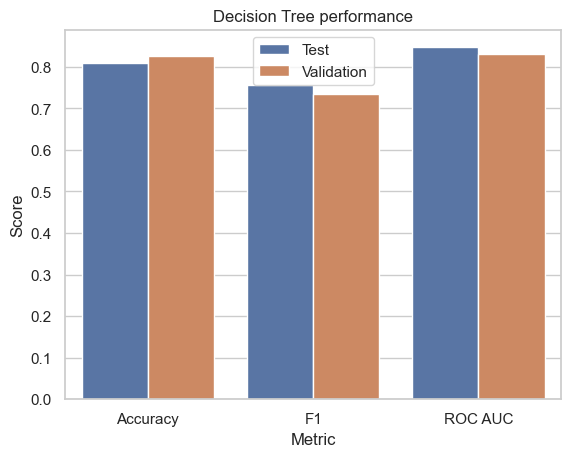

In [ ]:
import numpy as np

data = {
    'Dataset': ['Test', 'Test', 'Validation', 'Validation'],
    'Metric': ['Accuracy','F1', 'ROC AUC', 'Accuracy', 'F1','ROC AUC'],
    'Score': [lr_accracy,lr_f1_score, lr_roc_auc, lr_accracy_val,lr_f1_score_val, lr_roc_auc_val]
}

data = {
    'Dataset': ['Test', 'Test', 'Test', 'Validation', 'Validation', 'Validation'],
    'Metric': ['Accuracy', 'F1', 'ROC AUC', 'Accuracy', 'F1', 'ROC AUC'],
    'Score': [lr_accracy, lr_f1_score, lr_roc_auc, lr_accracy_val, lr_f1_score_val, lr_roc_auc_val]
}

df_summary = pd.DataFrame(data)


sns.barplot(x=df_summary['Metric'], y= df_summary['Score'], hue='Dataset', data = df_summary)
plt.title('Decision Tree performance')
plt.legend(loc ='best')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


### Decision Tree Model

In [ ]:

# build model

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# predict
dt_pred = dt.predict(X_test)

# evaluation
dt_accurate = accuracy_score(y_test, dt_pred)
dt_f1_score =f1_score(y_test, dt_pred)
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
dt_classification_report = classification_report(y_test,dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)

print('Decision Tree Accurate Score:', dt_accurate)
print('Decision Tree F1 Score: ', dt_f1_score)
print('Decision Tree Confusion Matrix:', dt_confusion_matrix)
print('Decision Tree Classification Report:', dt_classification_report)
print('Decision Tree ROC AUC:', dt_roc_auc)





Decision Tree Accurate Score: 0.8146067415730337
Decision Tree F1 Score:  0.7359999999999999
Decision Tree Confusion Matrix: [[99 10]
 [23 46]]
Decision Tree Classification Report:               precision    recall  f1-score   support

           0       0.81      0.91      0.86       109
           1       0.82      0.67      0.74        69

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178

Decision Tree ROC AUC: 0.7874617737003057


In [ ]:
# validation

y_pred_val = dt.predict(X_val)
dt_prob_val = lr.predict_proba(X_val)

dt_accracy_val = accuracy_score(y_val, y_pred_val)
dt_f1_score_val = f1_score(y_val, y_pred_val)
dt_confusion_matrix_val = confusion_matrix(y_val,y_pred_val)
# ROC AUC score
dt_roc_auc_val = roc_auc_score(y_val, lr_prob_val[:,1])

print('Decision Tree Accuracy Score: ', dt_accracy_val)
print('Decision Tree F1 Score: ', dt_f1_score_val)
print('Decision Tree Confusion Matrix: ', dt_confusion_matrix_val)
print('Decision Tree ROC AUC Score: ', dt_roc_auc_val)

Decision Tree Accuracy Score:  0.8202247191011236
Decision Tree F1 Score:  0.6981132075471698
Decision Tree Confusion Matrix:  [[109   5]
 [ 27  37]]
Decision Tree ROC AUC Score:  0.8314830043859649


### Random Forest Model

In [ ]:

# build model
rf = RandomForestClassifier(n_estimators=10, max_depth= None, min_samples_split=2, random_state=42)
rf.fit(X_test, y_test)

# predict
rf_pred = rf.predict(X_test)


# Evaluate performance
rf_accurate = accuracy_score(y_test, rf_pred)
rf_f1_score = f1_score(y_test, rf_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
rf_classification_report = classification_report(y_test,rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred)

print('Random Forest Accurate Score:', rf_accurate)
print('Random Forest F1 Score: ', rf_f1_score)
print('Random Forest Confusion Matrix:', rf_confusion_matrix)
print('Random Forest Classification Report:', rf_classification_report)
print('Random Forest ROC AUC:', rf_roc_auc)


Random Forest Accurate Score: 0.9606741573033708
Random Forest F1 Score:  0.9496402877697843
Random Forest Confusion Matrix: [[105   4]
 [  3  66]]
Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.97      0.96      0.97       109
           1       0.94      0.96      0.95        69

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178

Random Forest ROC AUC: 0.9599122457120064


In [ ]:
# validation

y_pred_val = dt.predict(X_val)
rf_prob_val = lr.predict_proba(X_val)

rf_accracy_val = accuracy_score(y_val, y_pred_val)
rf_f1_score_val = f1_score(y_val, y_pred_val)
rf_confusion_matrix_val = confusion_matrix(y_val,y_pred_val)
# ROC AUC score
rf_roc_auc_val = roc_auc_score(y_val, lr_prob_val[:,1])

print('Random Forest Accuracy Score: ', rf_accracy_val)
print('Random Forest  F1 Score: ', rf_f1_score_val)
print('Random Forest  Confusion Matrix: ', rf_confusion_matrix_val)
print('Random Forest  ROC AUC Score: ', rf_roc_auc_val)

Random Forest Accuracy Score:  0.8202247191011236
Random Forest  F1 Score:  0.6981132075471698
Random Forest  Confusion Matrix:  [[109   5]
 [ 27  37]]
Random Forest  ROC AUC Score:  0.8314830043859649


### SVM( support vector machine) Model

In [ ]:

#build model
svm = SVC(C=1.0, kernel='linear',gamma='scale')

# fit the model
svm.fit(X_train, y_train)

# prediction
svm_pred = svm.predict(X_test)

# Evaluate performance
svm_accurate = accuracy_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred)
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
svm_classification_report = classification_report(y_test,svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_pred)

print(' SVM Accurate Score:', svm_accurate)
print('SVM  F1 Score: ', svm_f1_score)
print('SVM  Confusion Matrix:', svm_confusion_matrix)
print('SVM  Classification Report:', svm_classification_report)
print('SVM  ROC AUC:', svm_roc_auc)

# validation

y_pred_val = dt.predict(X_val)
svm_prob_val = lr.predict_proba(X_val)

svm_accracy_val = accuracy_score(y_val, y_pred_val)
svm_f1_score_val = f1_score(y_val, y_pred_val)
svm__confusion_matrix_val = confusion_matrix(y_val,y_pred_val)
# ROC AUC score
svm__roc_auc_val = roc_auc_score(y_val, svm_prob_val[:,1])

print('SVM Validation Accuracy Score: ', svm_accracy_val)
print('SVM Validation F1 Score: ', svm_f1_score_val)
print('SVM Validation Confusion Matrix: ', svm__confusion_matrix_val)
print('SVM Validation  ROC AUC Score: ', svm__roc_auc_val)

 SVM Accurate Score: 0.8033707865168539
SVM  F1 Score:  0.7445255474452556
SVM  Confusion Matrix: [[92 17]
 [18 51]]
SVM  Classification Report:               precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.74      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

SVM  ROC AUC: 0.7915835660151576
SVM Validation Accuracy Score:  0.8202247191011236
SVM Validation F1 Score:  0.6981132075471698
SVM Validation Confusion Matrix:  [[109   5]
 [ 27  37]]
SVM Validation  ROC AUC Score:  0.8314830043859649


### KNN Model

In [ ]:


#build model

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred= knn.predict(X_test)


# Evaluate performance
knn_accurate = accuracy_score(y_test, knn_pred)
knn_f1_score = f1_score(y_test, knn_pred)
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
knn_classification_report = classification_report(y_test,knn_pred)
knn_roc_auc = roc_auc_score(y_test, knn_pred)

print('KNN Accurate Score:', knn_accurate)
print('KNN  F1 Score: ', knn_f1_score)
print('KNN  Confusion Matrix:', knn_confusion_matrix)
print('KNN  Classification Report:', knn_classification_report)
print('KNN  ROC AUC:', knn_roc_auc)

# validation

y_pred_val = dt.predict(X_val)
knn_prob_val = lr.predict_proba(X_val)

knn_accracy_val = accuracy_score(y_val, y_pred_val)
knn_f1_score_val = f1_score(y_val, y_pred_val)
knn__confusion_matrix_val = confusion_matrix(y_val,y_pred_val)
# ROC AUC score
knn__roc_auc_val = roc_auc_score(y_val, knn_prob_val[:,1])

print('SVM Validation Accuracy Score: ', knn_accracy_val)
print('SVM Validation F1 Score: ', knn_f1_score_val)
print('SVM Validation Confusion Matrix: ', knn__confusion_matrix_val)
print('SVM Validation  ROC AUC Score: ', knn__roc_auc_val)

KNN Accurate Score: 0.7808988764044944
KNN  F1 Score:  0.723404255319149
KNN  Confusion Matrix: [[88 21]
 [18 51]]
KNN  Classification Report:               precision    recall  f1-score   support

           0       0.83      0.81      0.82       109
           1       0.71      0.74      0.72        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

KNN  ROC AUC: 0.7732349421619465
SVM Validation Accuracy Score:  0.8202247191011236
SVM Validation F1 Score:  0.6981132075471698
SVM Validation Confusion Matrix:  [[109   5]
 [ 27  37]]
SVM Validation  ROC AUC Score:  0.8314830043859649


## Summary

In [ ]:
performance_data = {
    'Model': ['KNN', 'SVM', 'Random Forest', 'Decision Tree','Logistic Regession'],
    'Accuracy': [knn_accurate, svm_accurate, rf_accurate, dt_accurate,lr_accracy],
    'F1 Score': [knn_f1_score, svm_f1_score, rf_f1_score, dt_f1_score,lr_f1_score],
    'AUC': [knn_roc_auc, svm_roc_auc, rf_roc_auc, dt_roc_auc,lr_roc_auc]
}

# Create DataFrame
performance = pd.DataFrame(performance_data)

# sort by accuracy with Decending order
performance.sort_values(by='Accuracy', ascending=False, inplace=True)


performance




,Model,Accuracy,F1 Score,AUC
2,Random Forest,0.960674,0.949640,0.959912
3,Decision Tree,0.814607,0.736000,0.787462
4,Logistic Regession,0.808989,0.757143,0.847028
1,SVM,0.803371,0.744526,0.791584
0,KNN,0.780899,0.723404,0.773235


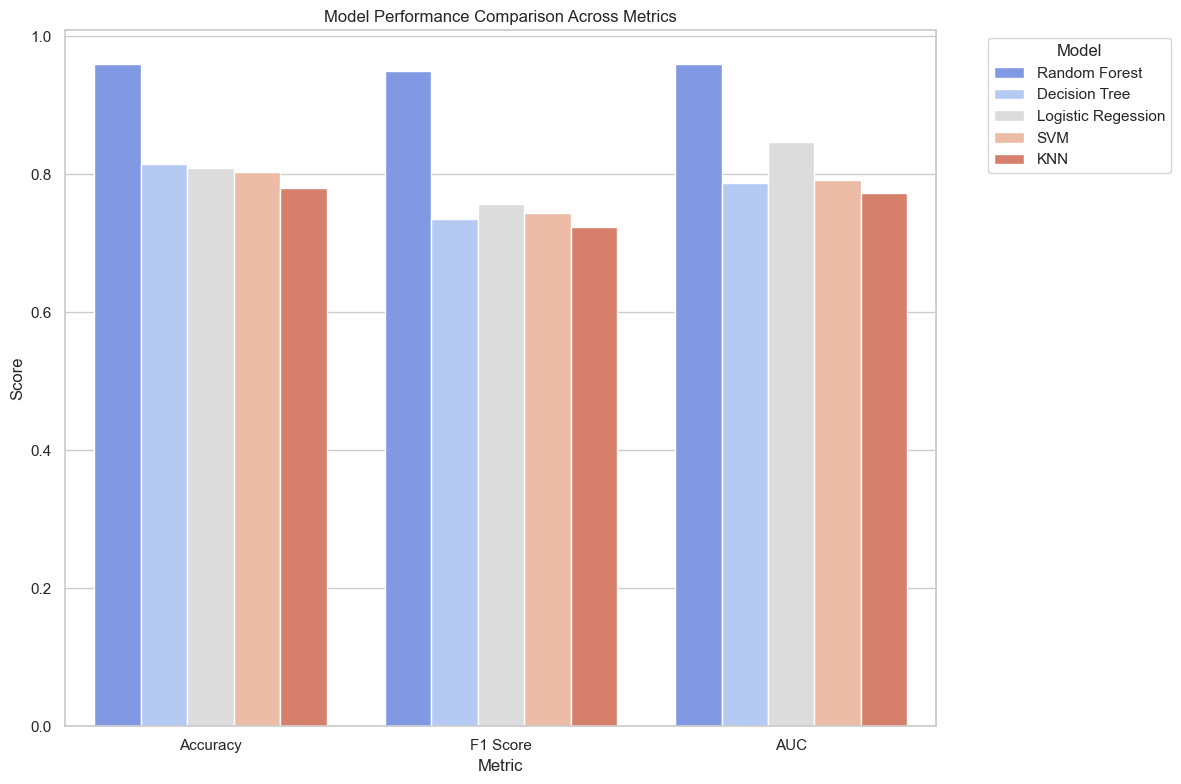

In [ ]:
# Plot bar chart to compare
sns.set(style="whitegrid")

performance_long_df = pd.melt(performance, id_vars=['Model'], value_vars=['Accuracy', 'F1 Score', 'AUC'])

plt.figure(figsize=(12, 8))
sns.barplot(x='variable', y='value', hue='Model', data=performance_long_df, palette='coolwarm')

plt.title('Model Performance Comparison Across Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')

plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




Overall, Random Forest stands out the best performance. Randome Forest model is ensemble models which perfom better than individual models , it reduces the variance and bias,  also has the ability to capture more complexity in the data. 

## Now we are predicting with the test data 

In [ ]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# fill Null value of 'Age' with the mean value by sex
df2['Age'] = df2['Age'].fillna(df2.groupby('Sex')['Age'].transform('mean'))

# drop 'Cabin' variable, due to have too much Null value
df2 = df2.drop('Cabin',axis=1)

# drop missing value in 'Embarked' feature
df2 = df2.dropna(subset=['Embarked'])

# drop missing value in 'Fare' feature
df2 = df2.dropna(subset=['Fare'])
# drop unrelated columns
df2 = df2.drop('PassengerId', axis=1)
df2 = df2.drop('Name', axis=1)
df2 = df2.drop('Ticket', axis=1)
df2.info()






<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [ ]:
# feature engineering

# define X
X = df2


# identify numerical and categorical columns
num_cols = X.select_dtypes(include=['float64','int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

#build pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


X2_test = pipeline.fit_transform(X)

# build model
rf = RandomForestClassifier(n_estimators=10, max_depth= None, min_samples_split=2, random_state=42)
rf.fit(X_test, y_test)

# predict
rf_test_pred = rf.predict(X2_test)

rf_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
df2['RF_test_pred'] = rf_test_pred

In [ ]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,RF_test_pred
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,0


In [ ]:
df2.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,RF_test_pred
count,417.000000,417,417.000000,417.000000,417.000000,417.000000,417,417.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,NaN
top,NaN,male,NaN,NaN,NaN,NaN,S,NaN
freq,NaN,265,NaN,NaN,NaN,NaN,269,NaN
mean,2.263789,NaN,30.200110,0.448441,0.393285,35.627188,NaN,0.333333
std,0.842077,NaN,12.562386,0.897568,0.982419,55.907576,NaN,0.471971
min,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,0.000000
25%,1.000000,NaN,23.000000,0.000000,0.000000,7.895800,NaN,0.000000
50%,3.000000,NaN,30.272362,0.000000,0.000000,14.454200,NaN,0.000000
75%,3.000000,NaN,35.000000,1.000000,0.000000,31.500000,NaN,1.000000
